In [28]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import ConvexHull
%matplotlib inline

## Applying the model

Let's try $k$-means on some [heart disease data](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.  Our goal will be to create a $k$-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

To make it easier to visualize our potential clusters, we will reduce the data to 2 components using PCA.

In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

In [4]:
# %%timeit pass

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

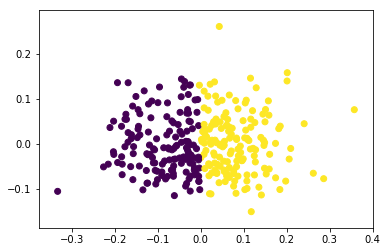

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [6]:
# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Looks like this model isn't doing very well. We're correctly classifying 182 cases, but mis-classifying 120 of the cases!

Now let's try MiniBatch:

In [7]:
# %%timeit pass

# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

In [8]:
# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0    1
row_0          
0      139    0
1       10  154


This marks a significant change. How substantial is the computational performance improvement? Try re-running the $k$-means and mini batch $k$-means models and timing their execution. Check out the [%timeit magic](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-timeit) for helpful timing tools.

## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

In [20]:
def value_to_index(l):
    d = {}
    for i, value in enumerate(l):
        if value in d:
            d[value].append(i)
        else:
            d[value] = [i]
    return d

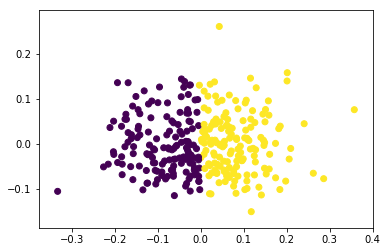

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [53]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

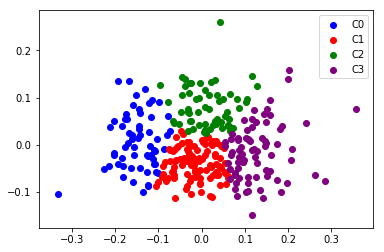

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56


In [76]:
# Calculate predicted values.
y_pred_4 = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)
v_to_i = value_to_index(y_pred_4)
c_0 = X_pca[v_to_i[0]]
c_1 = X_pca[v_to_i[1]]
c_2 = X_pca[v_to_i[2]]
c_3 = X_pca[v_to_i[3]]

# Plot the solution.
plt.scatter(c_0[:, 0], c_0[:, 1], c='blue', label='C0')
plt.scatter(c_1[:, 0], c_1[:, 1], c='red', label='C1')
plt.scatter(c_2[:, 0], c_2[:, 1], c='green', label='C2')
plt.scatter(c_3[:, 0], c_3[:, 1], c='purple', label='C3')
plt.legend()
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

# Appendix: Additional Visualizations

In [39]:
v_to_i = value_to_index(y_pred)
#vor_1 = Voronoi(X_pca[v_to_i[0]])
#vor_2 = Voronoi(X_pca[v_to_i[1]])
#voronoi_plot_2d(vor_1)
hull_1_vs = X_pca[v_to_i[0]]
hull_1 = ConvexHull(hull_1_vs)
hull_2_vs = X_pca[v_to_i[1]]
hull_2 = ConvexHull(hull_2_vs)

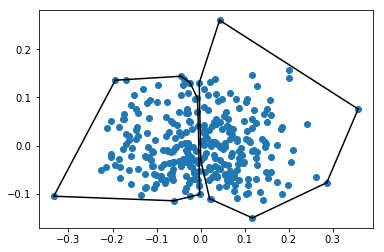

In [41]:
plt.plot(X_pca[:,0], X_pca[:,1], 'o')
for simplex in hull_1.simplices:
    plt.plot(hull_1_vs[simplex, 0], hull_1_vs[simplex, 1], 'k-')
for simplex in hull_2.simplices:
    plt.plot(hull_2_vs[simplex, 0], hull_2_vs[simplex, 1], 'k-')

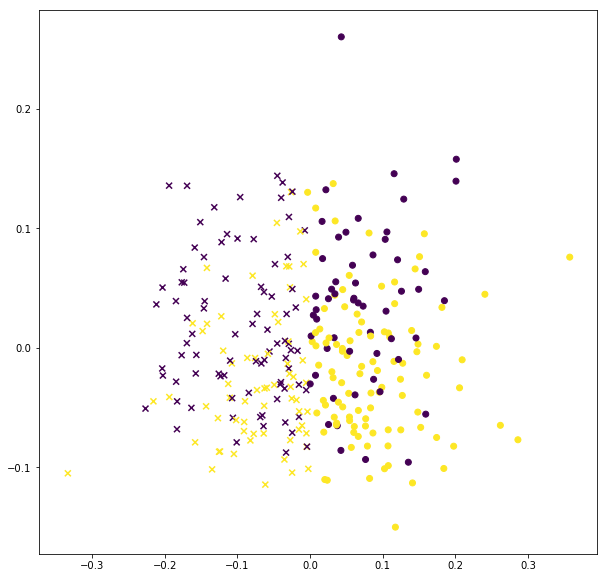

In [49]:
# Plot the solution.
plt.figure(figsize=(10,10))
plt.scatter(hull_1_vs[:, 0], hull_1_vs[:, 1], c=y[v_to_i[0]], marker='x')
plt.scatter(hull_2_vs[:, 0], hull_2_vs[:, 1], c=y[v_to_i[1]], marker='o')
plt.show()

In [50]:
v_to_i_real = value_to_index(y)

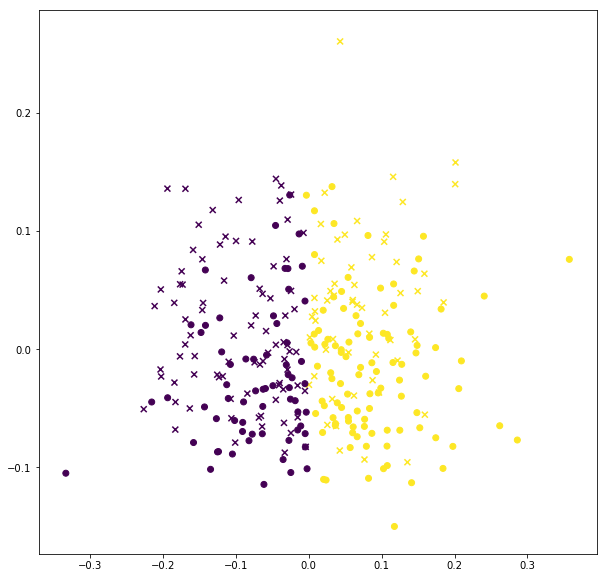

In [58]:
# Plot the solution.
plt.figure(figsize=(10,10))
plt.scatter(X_pca[v_to_i_real[0]][:, 0], X_pca[v_to_i_real[0]][:, 1], c=y_pred[v_to_i_real[0]], marker='x')
plt.scatter(X_pca[v_to_i_real[1]][:, 0], X_pca[v_to_i_real[1]][:, 1], c=y_pred[v_to_i_real[1]], marker='o')
plt.show()

In [61]:
y_pred_3 = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

v_to_i = value_to_index(y_pred_3)
v_to_i_real = value_to_index(y)

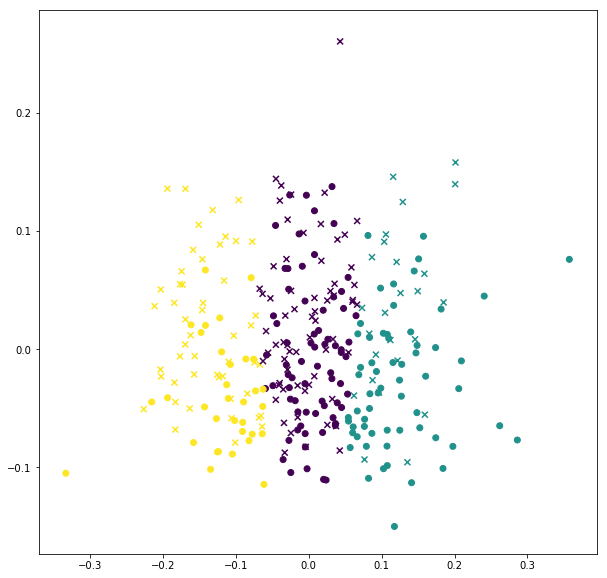

In [65]:
# Plot the solution.
plt.figure(figsize=(10,10))
plt.scatter(X_pca[v_to_i_real[0]][:, 0], X_pca[v_to_i_real[0]][:, 1], c=y_pred_3[v_to_i_real[0]], marker='x')
plt.scatter(X_pca[v_to_i_real[1]][:, 0], X_pca[v_to_i_real[1]][:, 1], c=y_pred_3[v_to_i_real[1]], marker='o')
plt.show()